In [1]:
# Para no tener que hacer restart con cada actualizacion 

%load_ext autoreload
%autoreload 2



# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)
import pickle

from itertools import product, combinations

from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
import tqdm as tqdm
from scipy.stats import chi2_contingency
import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import Soporte_ajuste_modelos as f

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek


from sklearn.model_selection import train_test_split,GridSearchCV
# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys




pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_preprocesado=pd.read_pickle("../../datos/datos3/datos_out_balanced.pkl").reset_index(drop=True)

## RANDOM FOREST

### Modelo A

Probar a meter parametros para mejorar

In [3]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("random_forest", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_random3.pkl")

-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

In [4]:
modelos_clasificacion.calcular_metricas(modelo_nombre="random_forest").T

,accuracy,precision,recall,f1,kappa,auc
train,0.98,0.98,0.98,0.98,0.97,1.00
test,0.89,0.90,0.89,0.89,0.77,0.92


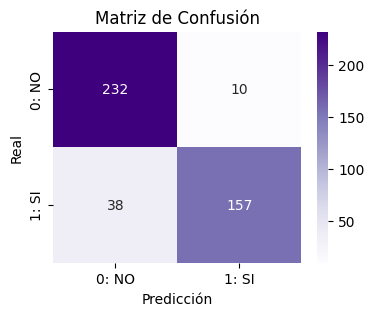

In [5]:
modelos_clasificacion.plot_matriz_confusion("random_forest", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

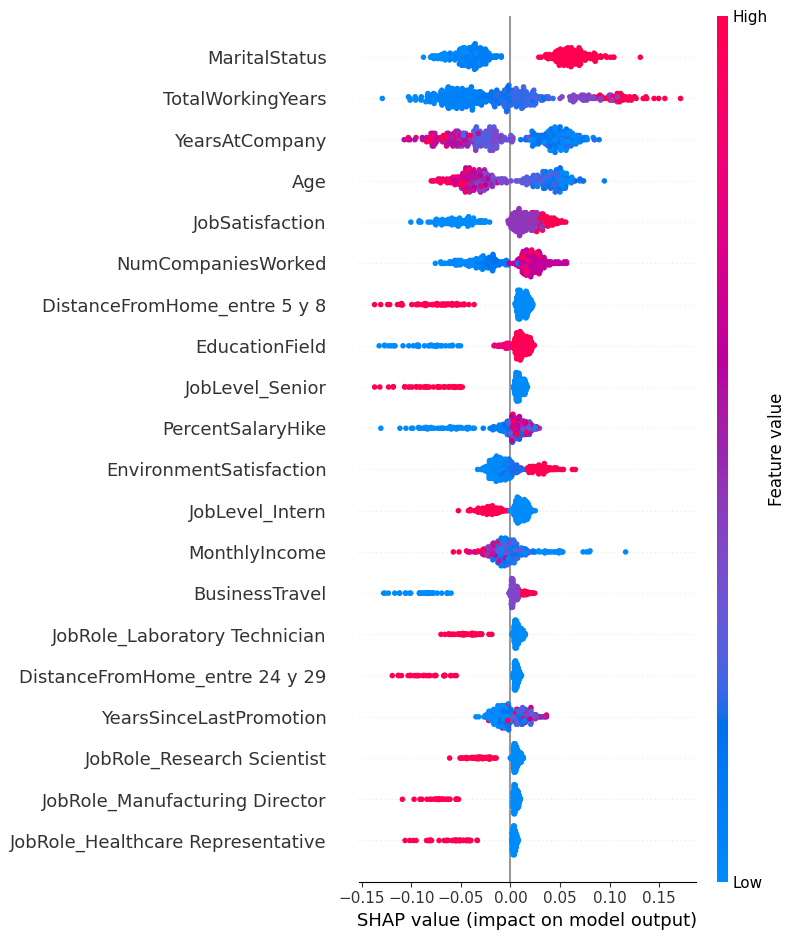

In [6]:
modelos_clasificacion.plot_shap_summary("random_forest")

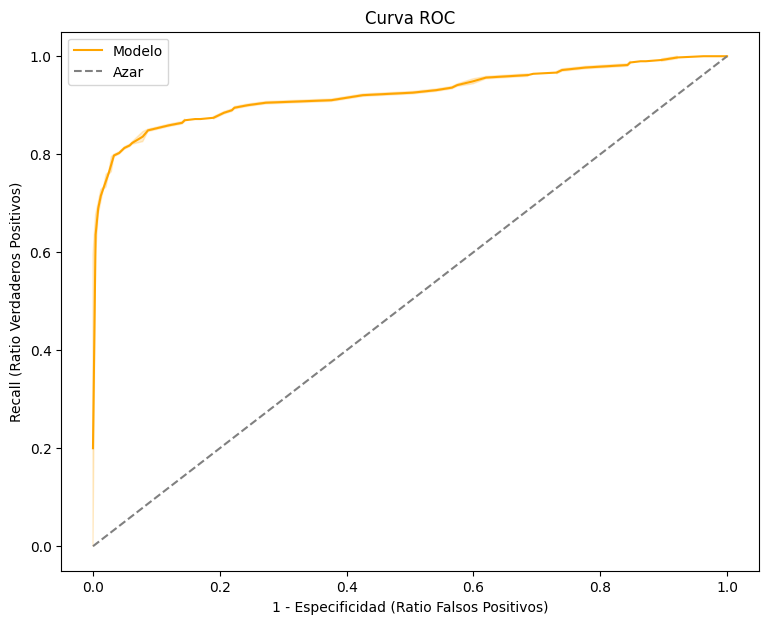

In [7]:
modelos_clasificacion.plot_curva_ROC(grafica_size = (9,7))

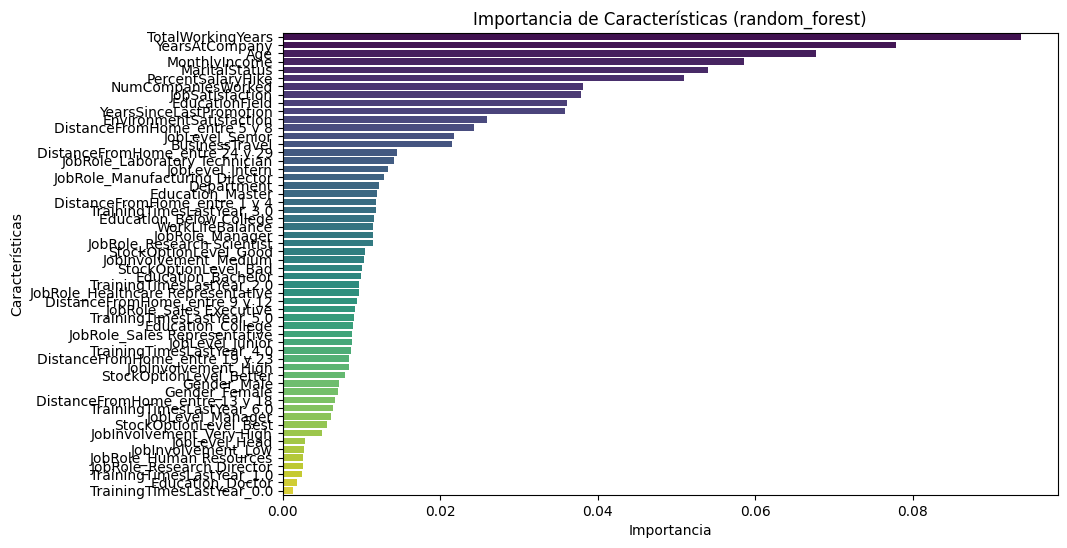

In [8]:
modelos_clasificacion.importancia_predictores("random_forest")

#### CON 0.7

### Modelo A.7

Probar a meter parametros para mejorar

In [9]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("random_forest", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_random3.7.pkl")

-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(min_samples_leaf=2, n_estimators=50, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

In [10]:
modelos_clasificacion.calcular_metricas(modelo_nombre="random_forest").T

,accuracy,precision,recall,f1,kappa,auc
train,0.99,0.99,0.99,0.99,0.98,1.00
test,0.89,0.89,0.89,0.88,0.76,0.93


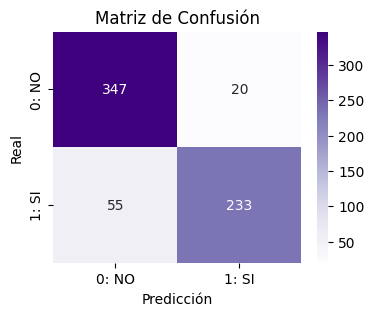

In [11]:
modelos_clasificacion.plot_matriz_confusion("random_forest", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

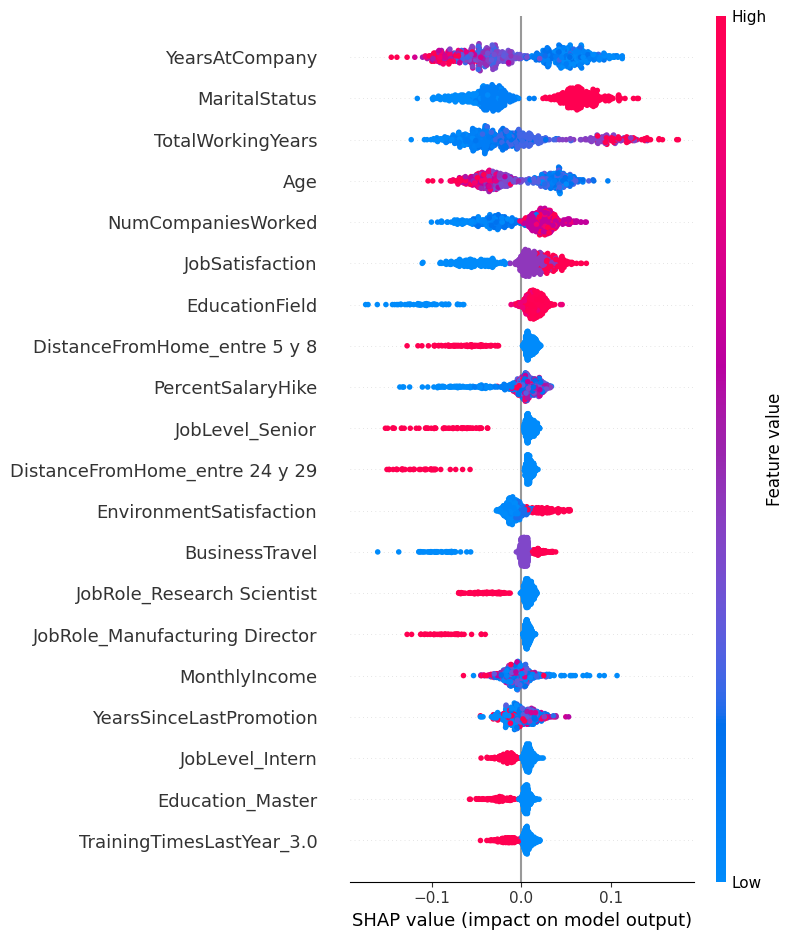

In [12]:
modelos_clasificacion.plot_shap_summary("random_forest")

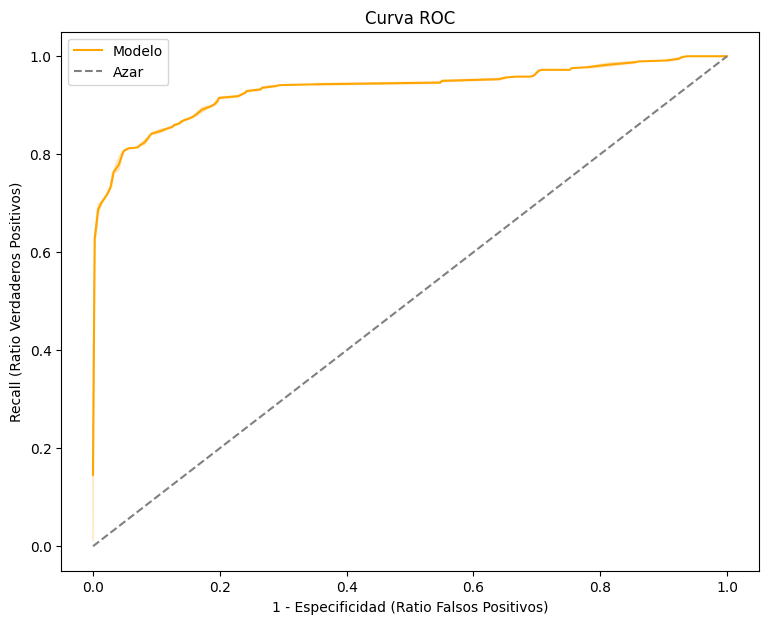

In [13]:
modelos_clasificacion.plot_curva_ROC(grafica_size = (9,7))

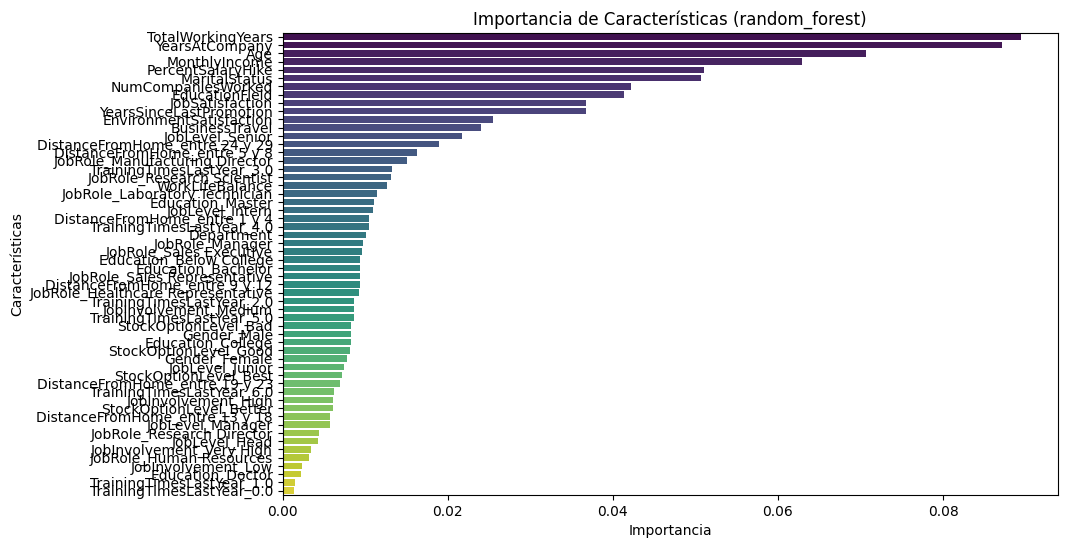

In [14]:
modelos_clasificacion.importancia_predictores("random_forest")

## Toco parametros

### Modelo B

Probar a meter parametros para mejorar

In [15]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("random_forest", param_grid={'n_estimators': [50, 100, 200],
 'max_depth': [10, 15,20,25, 30,40],
 'min_samples_split': [2, 5, 10,30,40],
 'min_samples_leaf': [4,6,10,20],
 'max_features': ['auto', 'sqrt', 'log2']},
 cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_random3B.pkl")

-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=25, max_features='log2', min_samples_leaf=4,
                       n_estimators=200, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

In [16]:
modelos_clasificacion.calcular_metricas(modelo_nombre="random_forest").T

,accuracy,precision,recall,f1,kappa,auc
train,0.95,0.96,0.95,0.95,0.91,1.00
test,0.88,0.88,0.88,0.87,0.75,0.91


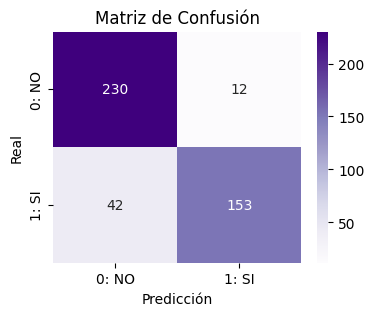

In [17]:
modelos_clasificacion.plot_matriz_confusion("random_forest", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

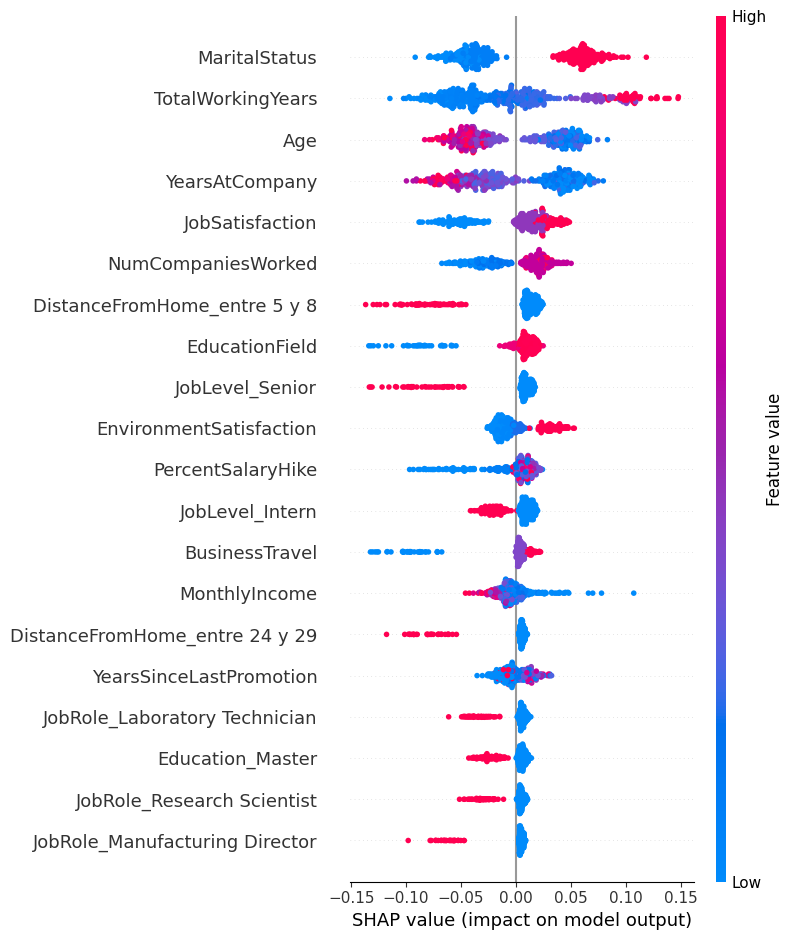

In [18]:
modelos_clasificacion.plot_shap_summary("random_forest")

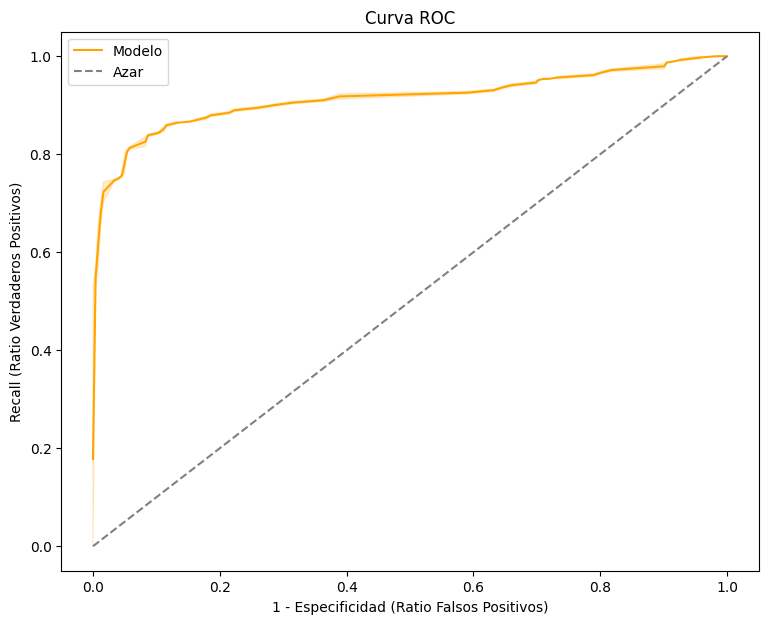

In [19]:
modelos_clasificacion.plot_curva_ROC(grafica_size = (9,7))

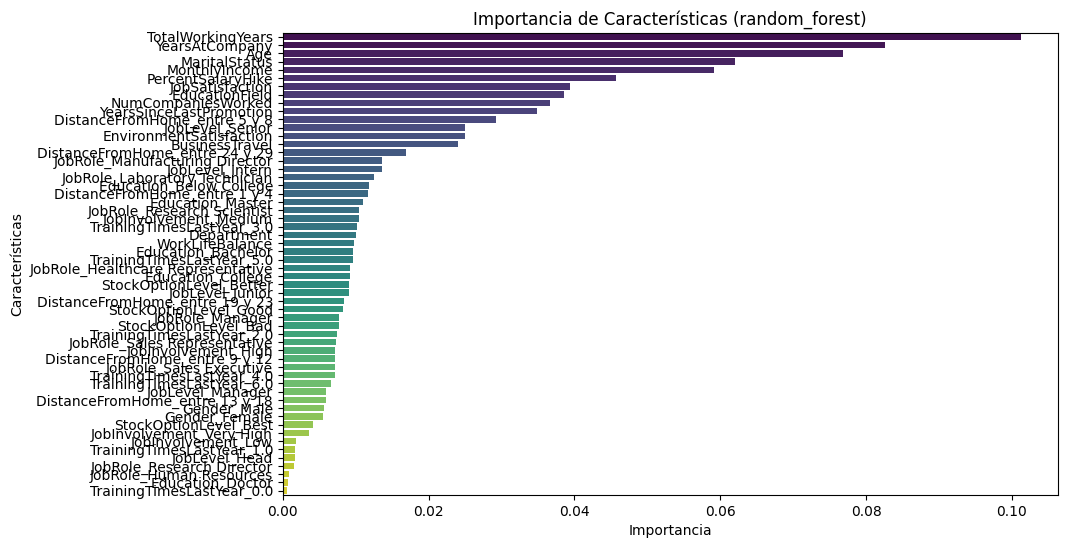

In [20]:
modelos_clasificacion.importancia_predictores("random_forest")

#### CON 0.7

### Modelo B.7

In [39]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("random_forest", param_grid={'n_estimators': [50, 100, 200],
 'max_depth': [10, 15,20,25, 30,40],
 'min_samples_split': [2, 5, 10,30,40],
 'min_samples_leaf': [4,6,10,20],
 'max_features': ['auto', 'sqrt', 'log2']},
 cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3",nombre_modelo_guardar="modelo_random3B7.pkl")

-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=20, min_samples_leaf=4, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

In [40]:
modelos_clasificacion.calcular_metricas(modelo_nombre="random_forest").T

,accuracy,precision,recall,f1,kappa,auc
train,0.95,0.96,0.95,0.95,0.90,1.00
test,0.88,0.88,0.88,0.88,0.75,0.93


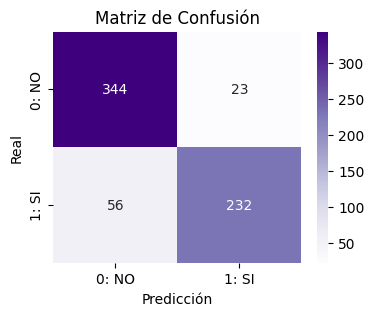

In [41]:
modelos_clasificacion.plot_matriz_confusion("random_forest", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

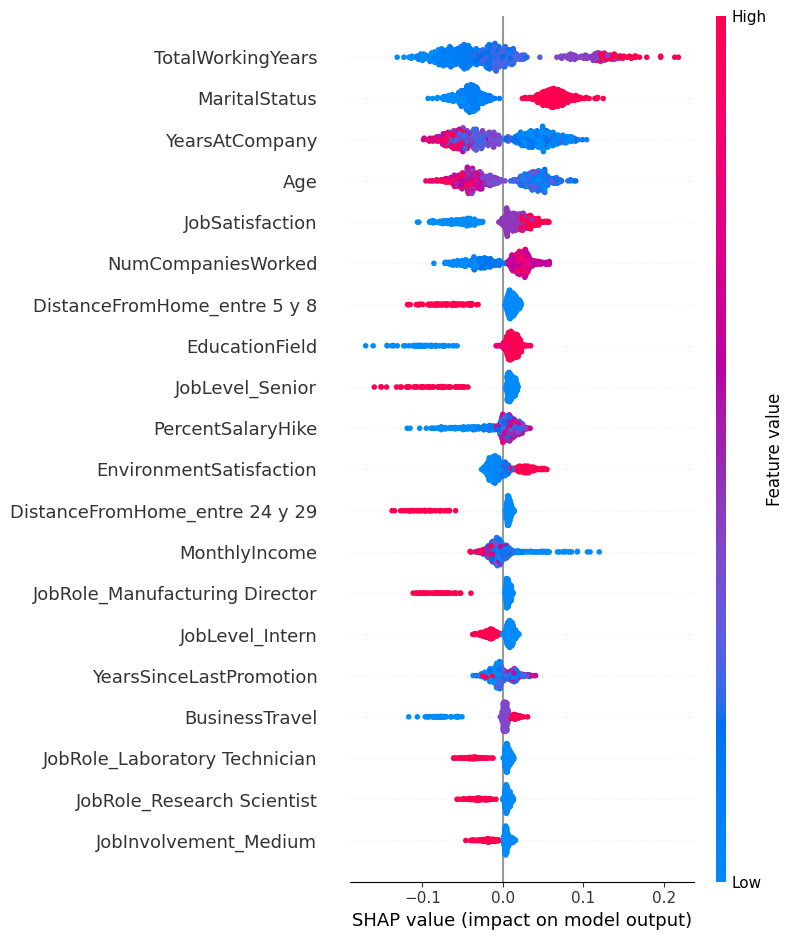

In [42]:
modelos_clasificacion.plot_shap_summary("random_forest")

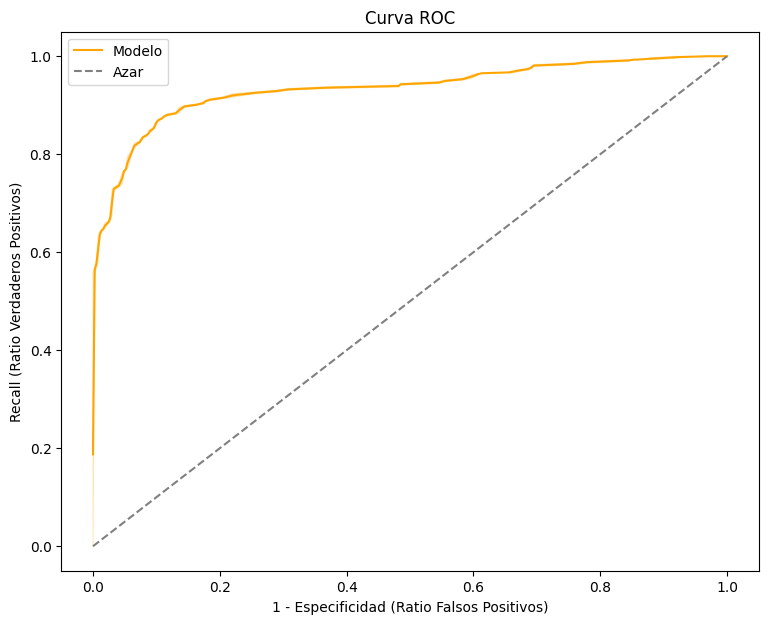

In [43]:
modelos_clasificacion.plot_curva_ROC(grafica_size = (9,7))

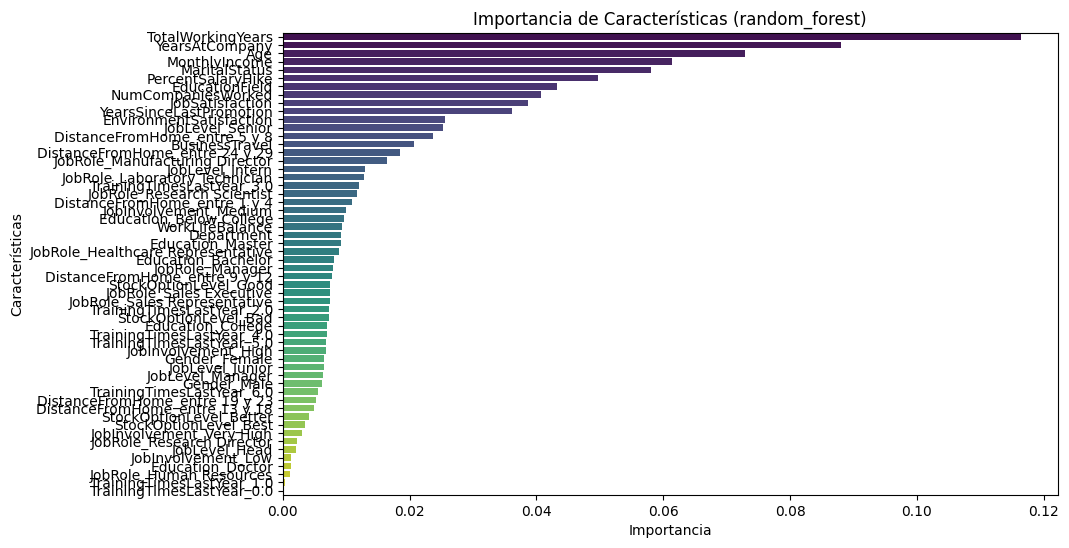

In [44]:
modelos_clasificacion.importancia_predictores("random_forest")

## Toco parametros2

### Modelo C

Probar a meter parametros para mejorar

In [27]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("random_forest", param_grid={'n_estimators': [30,50, 70,100,150],
 'max_depth': [10,12, 15,17,20,25],
 'min_samples_split': [2, 5, 8,10,15,20,30,40],
 'min_samples_leaf': [3,4,5,6,10,20],
 'max_features': ['auto', 'sqrt', 'log2']},
 cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_random3C.pkl")

-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=70, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

In [28]:
modelos_clasificacion.calcular_metricas(modelo_nombre="random_forest").T

,accuracy,precision,recall,f1,kappa,auc
train,0.95,0.95,0.95,0.95,0.90,0.99
test,0.87,0.87,0.87,0.87,0.73,0.91


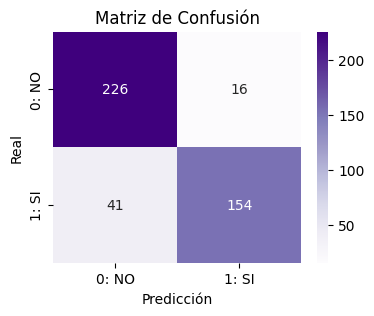

In [29]:
modelos_clasificacion.plot_matriz_confusion("random_forest", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

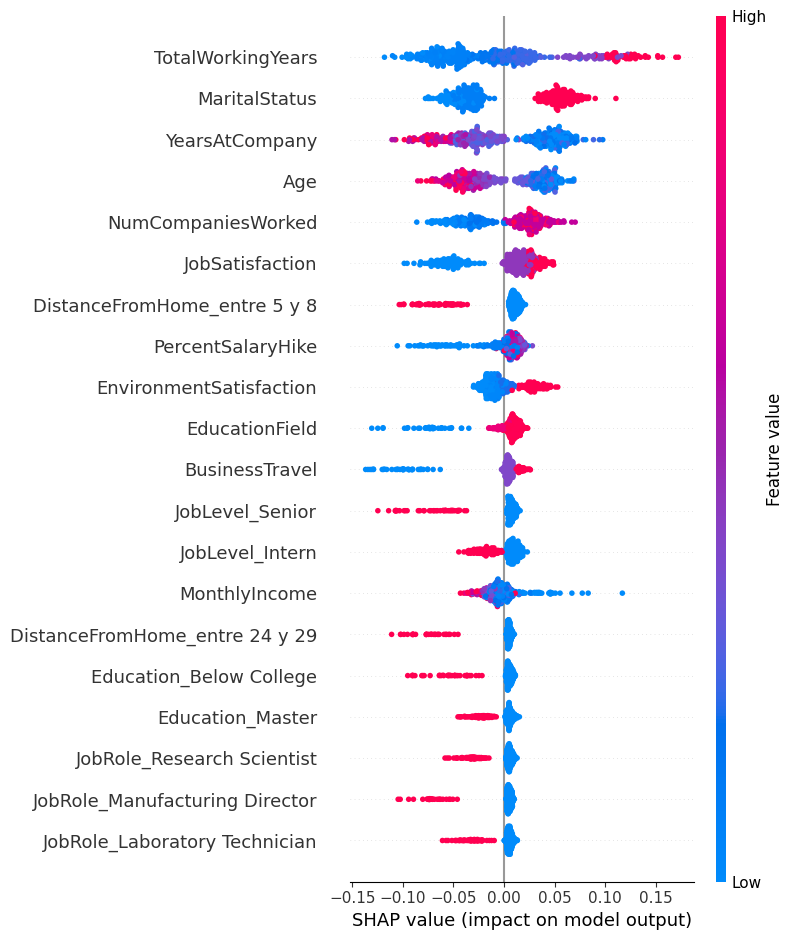

In [30]:
modelos_clasificacion.plot_shap_summary("random_forest")

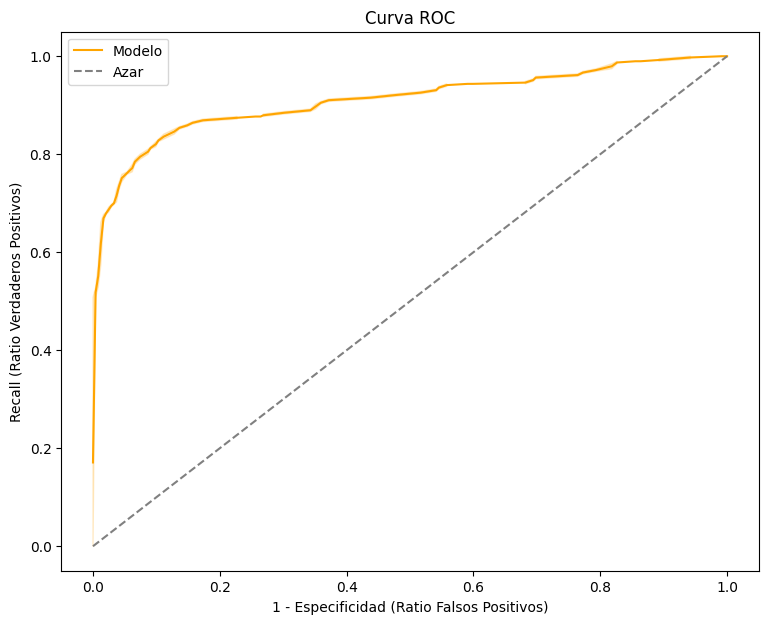

In [31]:
modelos_clasificacion.plot_curva_ROC(grafica_size = (9,7))

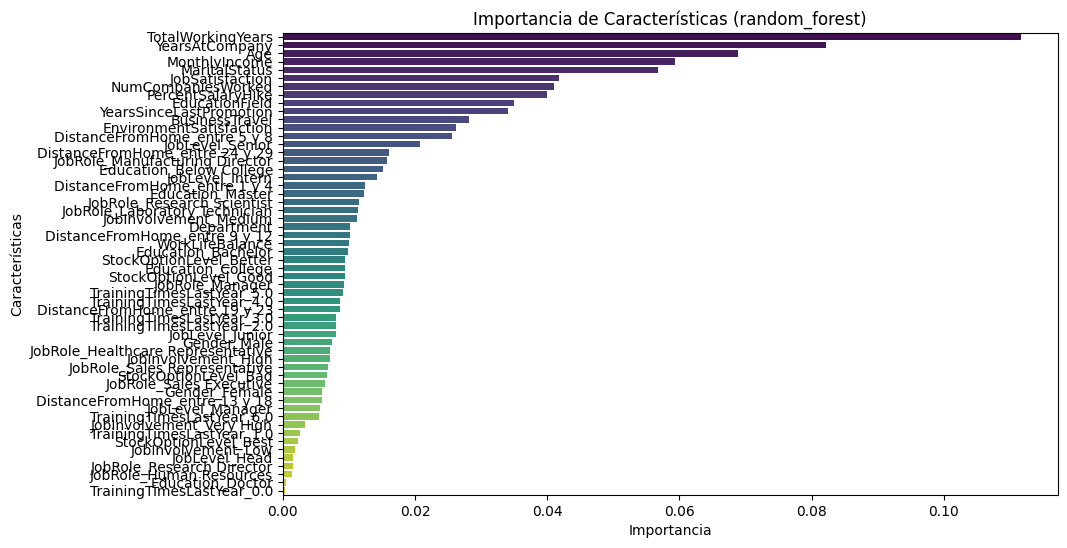

In [32]:
modelos_clasificacion.importancia_predictores("random_forest")

#### CON 0.7

### Modelo C.7

Probar a meter parametros para mejorar

In [33]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("random_forest", param_grid={'n_estimators': [30,50, 70,100,150],
 'max_depth': [10,12, 15,17,20,25],
 'min_samples_split': [2, 5, 8,10,15,20,30,40],
 'min_samples_leaf': [3,4,5,6,10,20],
 'max_features': ['auto', 'sqrt', 'log2']},
 cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_random3C7.pkl")

-------------------------------------------------
El mejor modelo es:
RandomForestClassifier(max_depth=17, min_samples_leaf=3, n_estimators=70,
                       random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2']}

In [34]:
modelos_clasificacion.calcular_metricas(modelo_nombre="random_forest").T

,accuracy,precision,recall,f1,kappa,auc
train,0.97,0.97,0.97,0.97,0.93,1.00
test,0.88,0.89,0.88,0.88,0.76,0.93


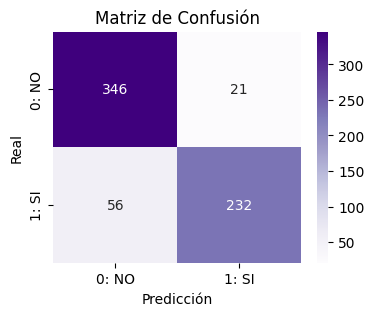

In [35]:
modelos_clasificacion.plot_matriz_confusion("random_forest", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

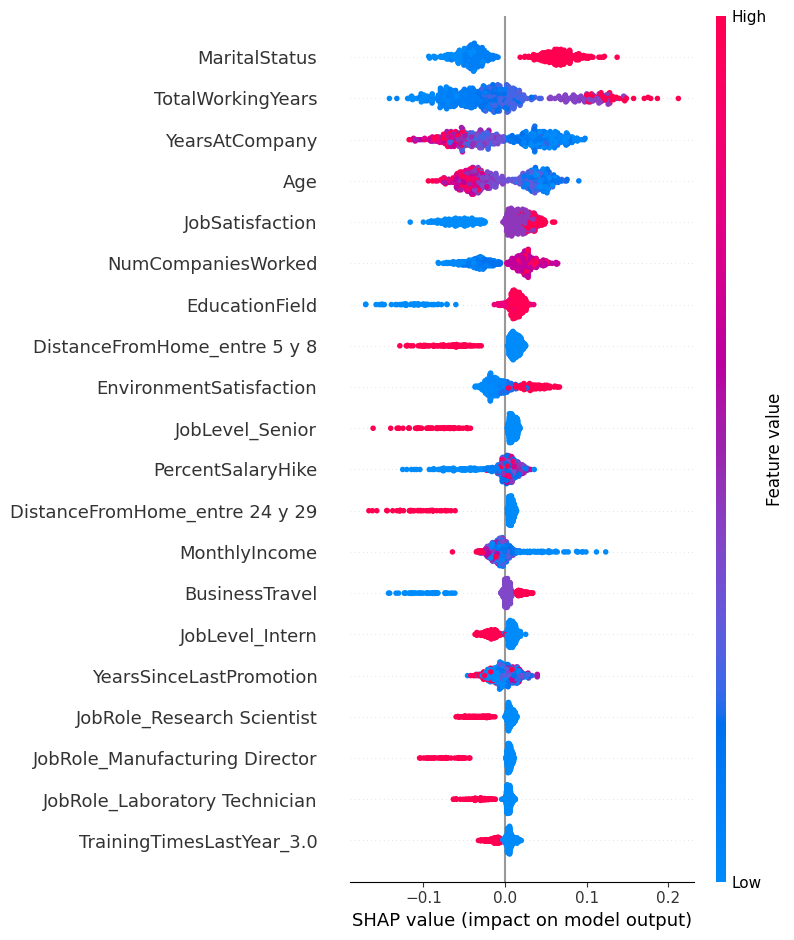

In [36]:
modelos_clasificacion.plot_shap_summary("random_forest")

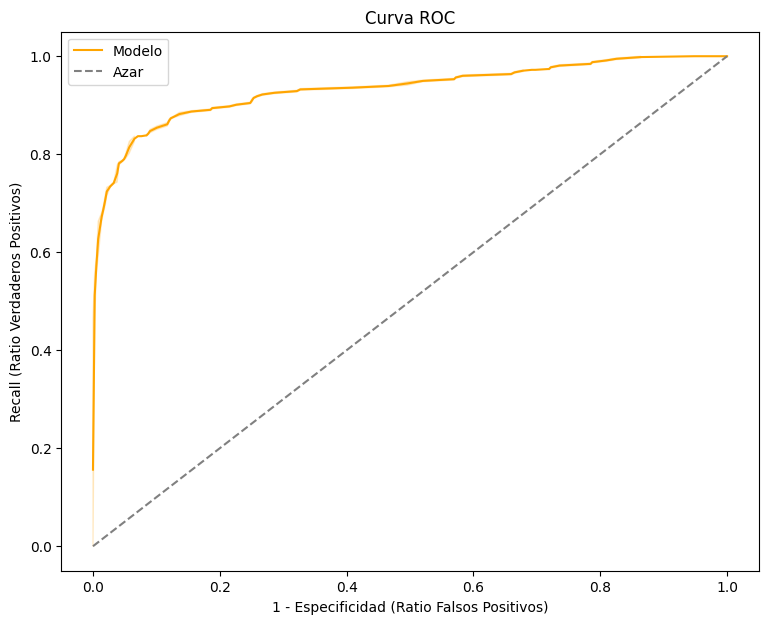

In [37]:
modelos_clasificacion.plot_curva_ROC(grafica_size = (9,7))

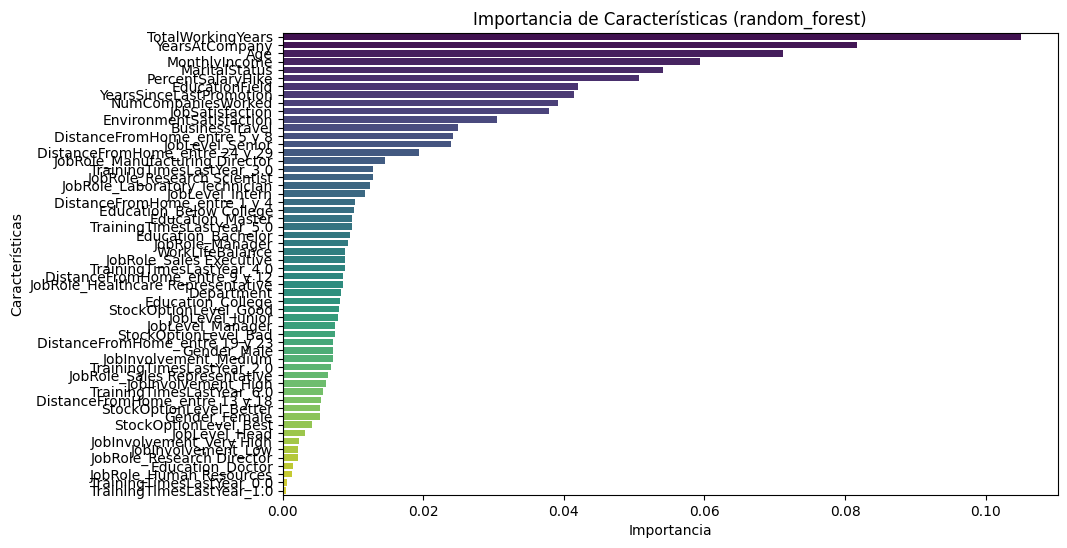

In [38]:
modelos_clasificacion.importancia_predictores("random_forest")

| Modelo     | Diff Accuracy | Diff Precision | Diff Recall | Diff F1  | Recall Test | Kappa Test | AUC Test |
|------------|---------------|----------------|-------------|----------|-------------|------------|----------|
| **A**      | 0.09          | 0.08           | 0.09        | 0.09     | 0.89        | 0.77       | 0.92     |
| **A.7**    | 0.10          | 0.10           | 0.10        | 0.11     | 0.89        | 0.76       | 0.93     |
| **B**      | 0.07          | 0.08           | 0.07        | 0.08     | 0.88        | 0.75       | 0.91     |
| **B.7**    | 0.07          | 0.08           | 0.07        | 0.07     | 0.88        | 0.75       | 0.93     |
| **C**      | 0.08          | 0.08           | 0.08        | 0.08     | 0.87        | 0.73       | 0.91     |
| **C.7**    | 0.09          | 0.08           | 0.09        | 0.09     | 0.88        | 0.76       | 0.93     |



### Conclusion de mejor RF:  
  

*Tras observar todas las métricas de los modelos me cuestiono si usar el modelo B.7 o el modelo C.7*       
  
**Primera opción (equilibrio general): Modelo B.7**  

Tiene menor overfitting, Recall alto en test y unas métricas equilibradas.

**Segunda opción (si quiero priorizar Kappa): Modelo C.7**  

Tiene unas metricas muy parecidas pero un leve over fitting mayor (un 0,02 mayor) pero su Kappa es 0.76 (0,01 mayor) 
Creo que merece la pena renunciar a la mejora del kappa (pero la diferencia sería mínima entre elegir cualquiera de los modelos)

#### ***Bajo mi criterio, prefiero el modelo B.7***  
